## Test du module Sequentiel

In [1]:
import sys
sys.path.insert(0, '../src')


from loss.MSELoss import MSELoss
from activation.Sigmoide import Sigmoide
from activation.TanH import TanH
from Linear import Linear
import numpy as np
from mltools import plot_data, plot_frontiere, gen_arti
import matplotlib.pyplot as plt
from Sequentiel import Sequentiel

from tqdm import tqdm 


In [2]:
# generations de points 
np.random.seed(1)

X, y = gen_arti(data_type=1, epsilon=0.001)

if y.ndim == 1 : 
    y = y.reshape((-1,1))
y = np.where(y > 0 , 1  , 0)

nombre_neurone = 2
nn = Sequentiel(Linear(X.shape[1],nombre_neurone),TanH(),Linear(nombre_neurone,y.shape[1]),Sigmoide())
loss = MSELoss()
nbIter = 500
list_loss = []
learning_rate = 0.01

for i in tqdm(range(nbIter)):
    y_hat = nn.forward(X)
    last_delta = loss.backward(y, y_hat)
    delta = nn.backward_delta(X, last_delta)
    nn.backward_update_gradient(X,delta)
    nn.update_parameters(learning_rate)
    nn.zero_grad()
    _loss = np.mean(loss.forward(y, y_hat))
    list_loss.append(_loss)
    print("Loss : ",_loss)


acc = np.where(y == nn.predict(X),1,0).mean()

100%|██████████| 500/500 [00:00<00:00, 3431.95it/s]

Loss :  0.49020580693393584
Loss :  0.48750459902570137
Loss :  0.48292340496890973
Loss :  0.4738774410001014
Loss :  0.4510700407113446
Loss :  0.36842789747023014
Loss :  0.25044716007492857
Loss :  0.291832733028574
Loss :  0.24083349352391395
Loss :  0.22183108672574325
Loss :  0.19523867885076102
Loss :  0.19158327560044167
Loss :  0.19142128575298253
Loss :  0.18995755814461426
Loss :  0.19118934984191235
Loss :  0.1891525165958999
Loss :  0.19110710417324953
Loss :  0.18820889473093497
Loss :  0.19049251343503396
Loss :  0.18723601781313307
Loss :  0.18969676661955293
Loss :  0.18641941494694408
Loss :  0.18903048651006185
Loss :  0.1857643449425178
Loss :  0.18851131788568024
Loss :  0.18522227247695625
Loss :  0.18808488624467085
Loss :  0.1847579273784703
Loss :  0.18771648847859956
Loss :  0.18435205330366278
Loss :  0.18739097041440567
Loss :  0.1839931070628748
Loss :  0.1871006231195858
Loss :  0.1836728094314321
Loss :  0.18683983717996075
Loss :  0.18338472592334445
Lo

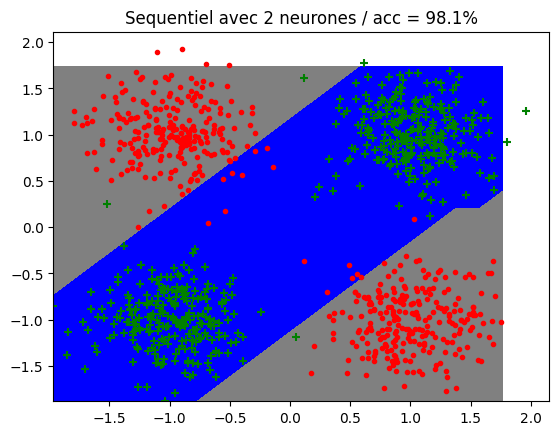

0.981
MSE :  0.015418210950691088
Taux de bonne classification :  98.1 %


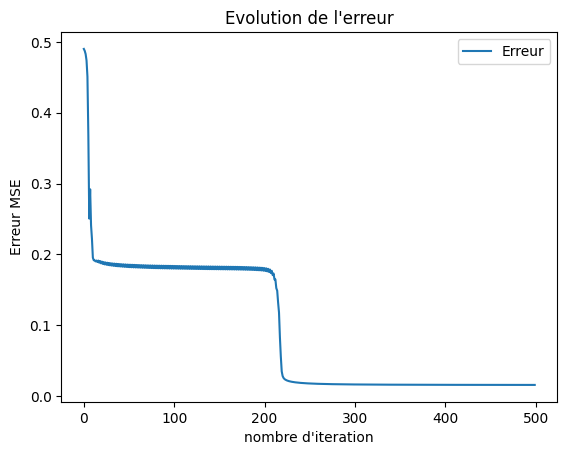

In [3]:
# affichage de la frontiere de decision ainsi que des donnees
plt.figure()
plot_frontiere(X,nn.predict )
plot_data(X,y)
plt.title(f"Sequentiel avec {nombre_neurone} neurones / acc = {(acc*100)}%")
plt.show()

print((np.where(nn.predict(X)>=0.5,1,0) == y ).mean())
    
print("MSE : ",np.mean(loss.forward(y, y_hat)))
print("Taux de bonne classification : ",((nn.predict(X) == np.where(y>=0.5,1,0)).sum()/len(np.where(y>=0.5,1,0)))*100,"%")
# affichage erreur 
plt.figure()
plt.xlabel("nombre d'iteration")
plt.ylabel("Erreur MSE")
plt.title("Evolution de l'erreur")
plt.plot(np.arange(nbIter),list_loss,label="Erreur")
plt.legend()
plt.show()